As opposed to the techniques explored in the previous lecture, some image enhancement techniques can't be expressed as

$$s = T(r) $$

where a pixel gray level in one space directly maps to a gray level in another space. Sometimes an image operation takes into account the pixel values of the *neighborhood* around a pixel. In this case, the neighborhood is referred to as the *filter, mask, kernel, template, or window.*

The machanics of **spatial filtering** consist of moving the filter mask from point to point in an image. At each point, the response to the filter is calculated using a pre-defined relationship. For **linear** spatial filtering, the response is given by the sum of products of the filter coefficients and the corresponding image pixels. 

# Smoothing Filters

Smoothing filters are used for blurring and noise reduction. Blurring is used in pre-processing steps, such as removal of small details from an image prior to object extraction, and bridging small gaps or curves.

The output of a smoothing, linear spatial filter is simply the *average* of the pixels contained in the neighborhood of the filter mask. Hence the term **averaging filters**.

In [48]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.morphology import square
from skimage.filters import rank, laplace
from skimage.util import img_as_float

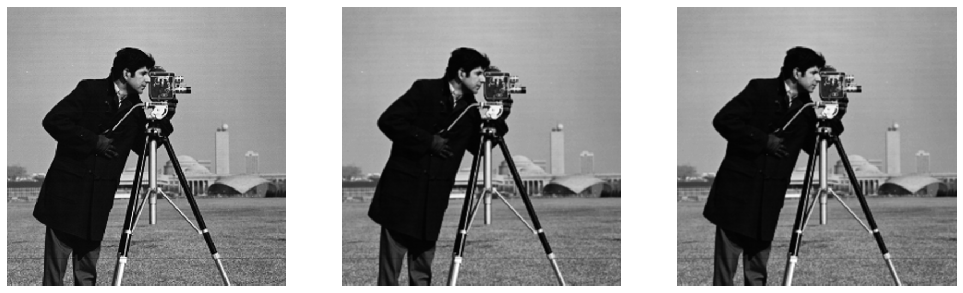

In [44]:
im = data.camera()

# normal average
selem = square(3)/9
im_avg = convolve(im, selem)
#im_avg = rank.mean(im, square(3))

# weighted average
#selem = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
selem = np.array([[4,2,4],[2,1,2],[4,2,4]])/25
im_avg2 = rank.mean(im, selem)

fig, axes = plt.subplots(ncols=3, figsize=(17,6))

for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_avg, cmap='gray')
axes[2].imshow(im_avg2, cmap='gray')

# Order Statistics Filters

Some of the most common non-linear filters are *order statistics filters*. The response is based on ordering (or ranking) the pixels in the image area encompassed by the filter, and replacing the value of the center pixel with a value determined by the ranking. The most common of these are the **median filter**, **max filter**, and **min filter**.

Median filters are quite popular for noise reduction, which less blurring than linear smoothing filters. They are particularly effective when dealing with *salt and pepper noise*.

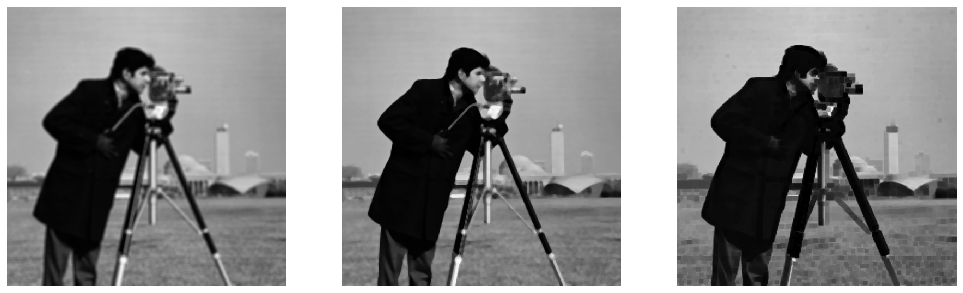

In [34]:

# normal average
selem = square(7)

im_avg = rank.mean(im, selem)
im_med = rank.median(im, selem)
im_max = rank.minimum(im, selem)

fig, axes = plt.subplots(ncols=3, figsize=(17,6))

for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im_avg, cmap='gray')
axes[1].imshow(im_med, cmap='gray')
axes[2].imshow(im_max, cmap='gray')

## Sharpening Spatial Filters

The principle of sharpening is to highlight fine detail in an image or to enhance detail that has been blurred. In the previou section, we saw that blurring could be achieved by using an averaging filter. Since averaging is analogous to intergration, it is logical to conclude that sharpening can be accomplished by differentation. Image differentiation enhances edges and other discontinuities (such as noise) and deemphasizes ares with slowly varying gray areas.

Derivatives in terms of a digital image are defined in terms of differences. 

A second-order derivative is much more aggressive than a first-order derivative in enhancing sharp changes. Thus, a second-order derivative enhances fine detail much more than a first order derivative. Second-order derivatives are used much more commonly than first-order derivatives for sharpening.

We desire any filter that we apply to be **isotropic** meaning it is rotation-invariant. Rotating the image and then applying the filter gives the same result.

The simplest isotropic derivative operator is the **LaPlacian**:

$$ \nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

This can be expressed discretely as:

$$\frac{\partial^2 f}{\partial x^2} = f(x+1,y) + f(x-1,y) - 2f(x,y) $$

and 

$$\frac{\partial^2 f}{\partial y^2} = f(x,y+1) + f(x,y-1)-2f(x,y) $$

You can also account for diagonal directions by adding in 4 more terms.

In [66]:
selem = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

print(selem)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


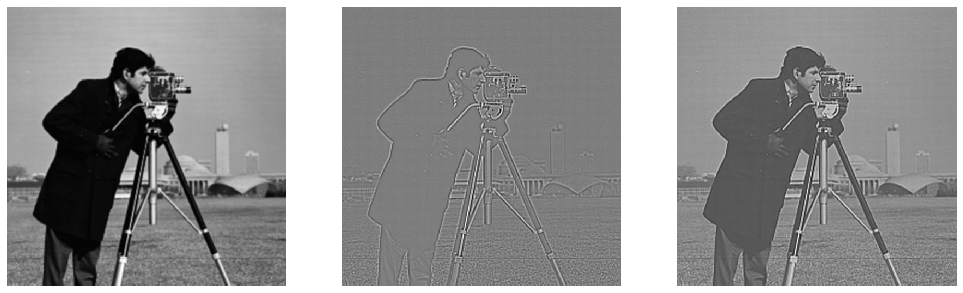

In [76]:
# LaPlacian
im_avg = img_as_float(rank.mean(im, square(3)))
im_lap = convolve(im_avg, selem)
#im_lap = laplace(im_avg, ksize=11)
#im_avg = rank.mean(im, square(3))

fig, axes = plt.subplots(ncols=3, figsize=(17,6))

for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im_avg, cmap='gray')
axes[1].imshow(im_lap, cmap='gray')
axes[2].imshow(im_avg + im_lap, cmap='gray')

# Unsharp masking

Another method used to sharpen images is to subtract a blurred image from the image itself, called **unsharp masking**:

$$f_x(x,y) = f(x,y) - \bar{f}(x,y) $$

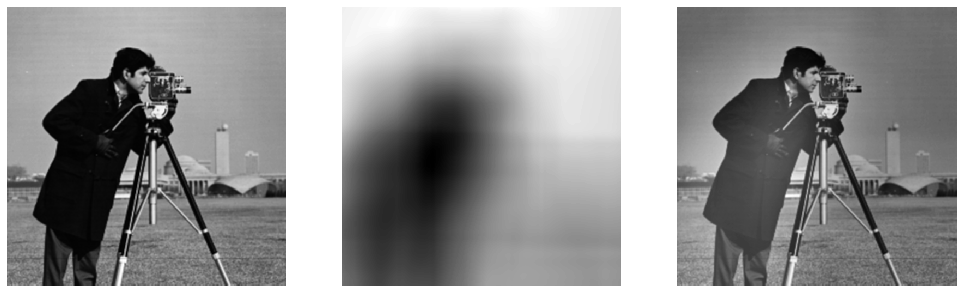

In [85]:
im_avg = img_as_float(rank.mean(im, square(3)))
im_blur = img_as_float(rank.mean(im_avg, square(200)))
#im_lap = laplace(im_avg, ksize=11)
#im_avg = rank.mean(im, square(3))

fig, axes = plt.subplots(ncols=3, figsize=(17,6))

for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im_avg, cmap='gray')
axes[1].imshow(im_blur, cmap='gray')
axes[2].imshow(im_avg - im_blur, cmap='gray')